In [1]:
##import the required libraries and APIs
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

print(tf.__version__)

2.5.0


In [2]:
##load the imdb reviews dataset
data, info = tfds.load("imdb_reviews", with_info=True, as_supervised=True)

In [3]:
##segregate training and test set
train_data, test_data = data['train'], data['test']

##create empty list to store sentences and labels
train_sentences = []
test_sentences = []

train_labels = []
test_labels = []

In [4]:
##iterate over the train data to extract sentences and labels
for sent, label in train_data:
    train_sentences.append(str(sent.numpy().decode('utf8')))
    train_labels.append(label.numpy())

##iterate over the test set to extract sentences and labels
for sent, label in test_data:
    test_sentences.append(str(sent.numpy().decode('utf8')))
    test_labels.append(label.numpy())

In [5]:
##convert lists into numpy array
train_labels = np.array(train_labels)
test_labels = np.array(test_labels)

#### Data Preparation

In [6]:
##define the parameters for the tokenizing and padding
vocab_size = 10000
embedding_dim = 16
max_length = 120
trunc_type='post'
oov_tok = "<OOV>"

In [7]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index

##training sequences and labels
train_seqs = tokenizer.texts_to_sequences(train_sentences)
train_padded = pad_sequences(train_seqs, maxlen=max_length, truncating=trunc_type)

##testing sequences and labels
test_seqs = tokenizer.texts_to_sequences(test_sentences)
test_padded = pad_sequences(test_seqs,maxlen=max_length)

### Defining the Neural Network

In [8]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

##compile the model with loss function, optimizer and metrics
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 120, 16)           160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 32)                544       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 160,577
Trainable params: 160,577
Non-trainable params: 0
_________________________________________________________________


In [9]:
num_epochs = 25

##train the model with training and validation set
history = model.fit(
    train_padded,   #training sequence
    train_labels, # training labels
    epochs=num_epochs, 
    validation_data=(test_padded, test_labels) # test data
    )

Epoch 1/25
782/782 [==============================] - 3s 2ms/step - loss: 0.5020 - accuracy: 0.7636 - val_loss: 0.3537 - val_accuracy: 0.8490
Epoch 2/25
782/782 [==============================] - 3s 3ms/step - loss: 0.3002 - accuracy: 0.8760 - val_loss: 0.3290 - val_accuracy: 0.8582
Epoch 3/25
782/782 [==============================] - 3s 3ms/step - loss: 0.2449 - accuracy: 0.9019 - val_loss: 0.3564 - val_accuracy: 0.8484
Epoch 4/25
782/782 [==============================] - 3s 3ms/step - loss: 0.2099 - accuracy: 0.9208 - val_loss: 0.3825 - val_accuracy: 0.8430
Epoch 5/25
782/782 [==============================] - 3s 3ms/step - loss: 0.1852 - accuracy: 0.9323 - val_loss: 0.4158 - val_accuracy: 0.8375
Epoch 6/25
782/782 [==============================] - 3s 3ms/step - loss: 0.1636 - accuracy: 0.9415 - val_loss: 0.4651 - val_accuracy: 0.8302
Epoch 7/25
782/782 [==============================] - 3s 4ms/step - loss: 0.1474 - accuracy: 0.9474 - val_loss: 0.5075 - val_accuracy: 0.8256
Epoch 

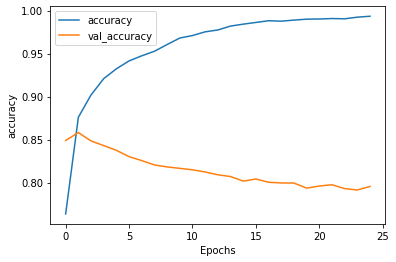

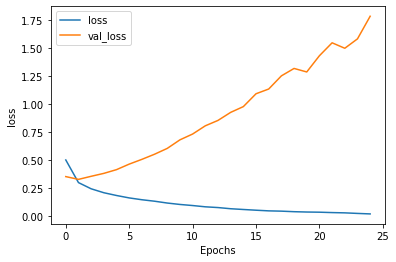

In [11]:
import matplotlib.pyplot as plt

##plot the scores from history
def plot_metrics(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric])
  plt.legend([metric, 'val_'+metric])
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.show()
  
##plot accuracy
plot_metrics(history, "accuracy")

##plot loss
plot_metrics(history, "loss")

### Classify new reviews

In [20]:
sentence = ["The first part of the movie was dull and boring!", "We watched Queen's Gambit, in a single sitting. This show is an absolute gem."]

##prepare the sequences of the sentences in question
sequences = tokenizer.texts_to_sequences(sentence)
padded_seqs = pad_sequences(sequences, maxlen=max_length, truncating=trunc_type)

##print the classification score
print(model.predict(padded_seqs))

[[0.00611505]
 [0.10234499]]


In [21]:
sentence = ["The first part of the movie was dull and boring!", "It is a very bad movie!"]

##prepare the sequences of the sentences in question
sequences = tokenizer.texts_to_sequences(sentence)
padded_seqs = pad_sequences(sequences, maxlen=max_length, truncating=trunc_type)

##print the classification score
print(model.predict(padded_seqs))

[[0.00611505]
 [0.03281558]]


In [25]:
sentence = ["It is a good movie", ""]

##prepare the sequences of the sentences in question
sequences = tokenizer.texts_to_sequences(sentence)
padded_seqs = pad_sequences(sequences, maxlen=max_length, truncating=trunc_type)

##print the classification score
print(model.predict(padded_seqs))

[[0.718324 ]
 [0.8724136]]
